In [1]:
# %load C60_jupyter_imports.py
%load_ext autoreload
%autoreload 2

import xarray as xr
import numpy as np
from dask.distributed import Client
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import xesmf as xe
from scipy.stats import linregress
import os
import requests
# Lets import our functions. There are no tests here. Stored separately so as to not make a mess.
# Make sure in right dir first

os.chdir('/g/data/xv83/np1383/src_CAFE60_eqpac_analysis_code/')
from C60_obs_functions import cut_regrid_reynolds_sst,cut_process_sst_obs_trends,proc_landschutzer,process_co2_land_trends

In [2]:
#Load CO2 and SST OBS PRODUCTS
land_co2=xr.open_dataset('../processed_data/obs/landshutzer_global_regrid.nc')/365 #g/m2/day
land_co2_82tr=xr.open_dataset('../processed_data/obs/landshutzer_global_regrid_trend_1982.nc')
land_co2_20tr=xr.open_dataset('../processed_data/obs/landshutzer_global_regrid_trend_2000.nc')

In [10]:
cafe_co2_std=xr.open_dataset('../processed_data/cafe/eqpac/stf10_ensstd_1982.nc')
cafe_co2_mean=xr.open_dataset('../processed_data/cafe/eqpac/stf10_ensmean_1982.nc')
cafe_co2_82tr=xr.open_dataset('../processed_data/cafe/eqpac/stf10_meantrends_1982.nc')
cafe_co2_20tr=xr.open_dataset('../processed_data/cafe/eqpac/stf10_meantrends_2000.nc')

In [11]:
cafe_co2_natural_mean=xr.open_dataset('../processed_data/cafe/eqpac/stf07_ensmean_1982.nc')
cafe_co2_natural_82tr=xr.open_dataset('../processed_data/cafe/eqpac/stf07_meantrends_1982.nc')
cafe_co2_natural_20tr=xr.open_dataset('../processed_data/cafe/eqpac/stf07_meantrends_2000.nc')

In [5]:
cafe_co2_all=(xr.open_dataset('../processed_data/cafe/eqpac/stf10_ensmean_1982_all_ensembles.nc',chunks={'time':1}))#.chunk({'time':1})#/1000)*86400)*-12)#g/m2/day
cafe_sst_all=xr.open_dataset('../processed_data/cafe/eqpac/sst_ensmean_1982_all_ensembles.nc',chunks={'time':1})#.chunk({'time':1})

In [32]:
natural_co2=cafe_co2_natural_mean.stf07
anth_co2=cafe_co2_mean.stf10-cafe_co2_natural_mean.stf07
all_co2=cafe_co2_mean.stf10

In [33]:
natural_co2_perc=natural_co2/all_co2*100
anth_co2_perc=anth_co2/all_co2*100

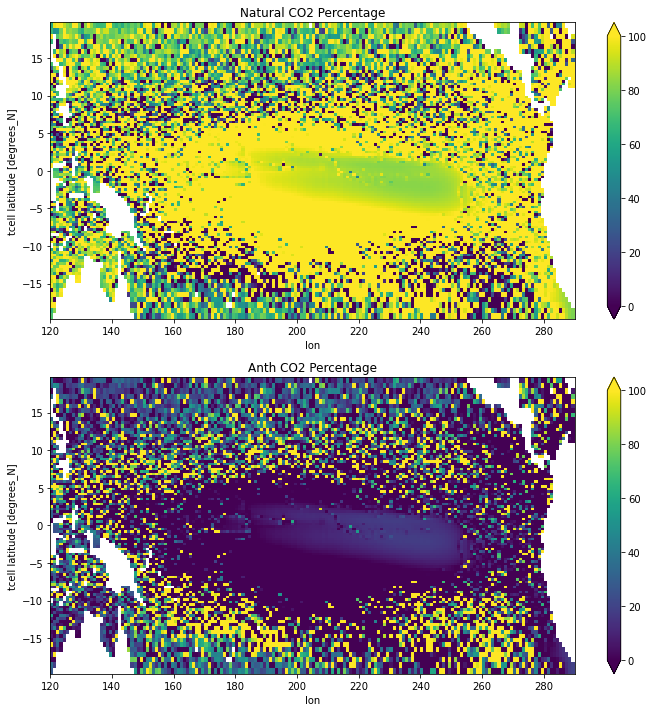

In [46]:
plt.figure(figsize=(10,10))
plt.subplot(211)
natural_co2_perc.mean(dim='time').plot(vmin=0,vmax=100)
plt.title('Natural CO2 Percentage')
plt.subplot(212)
anth_co2_perc.mean(dim='time').plot(vmin=0,vmax=100)
plt.title('Anth CO2 Percentage')
plt.tight_layout()

In [39]:
# Look at some of the phsical outputs to check the ANTH co2 - What convergence is appebing at 200E, 2N. 2 frontal zones.

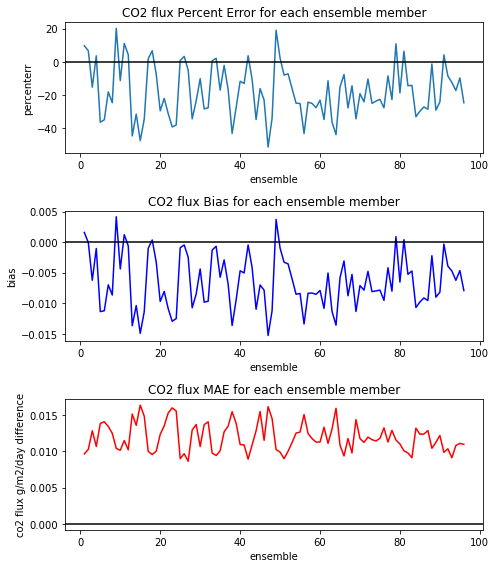

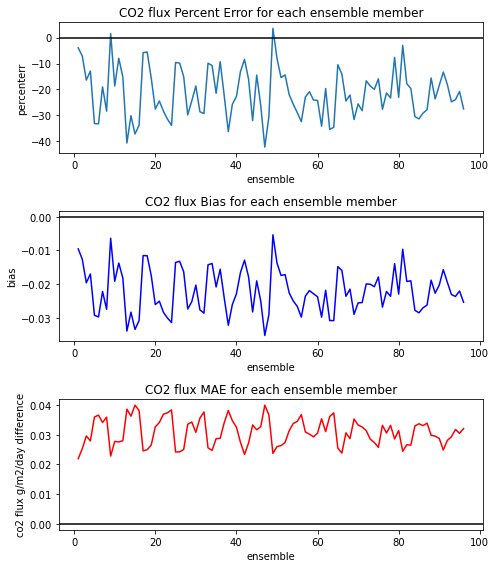

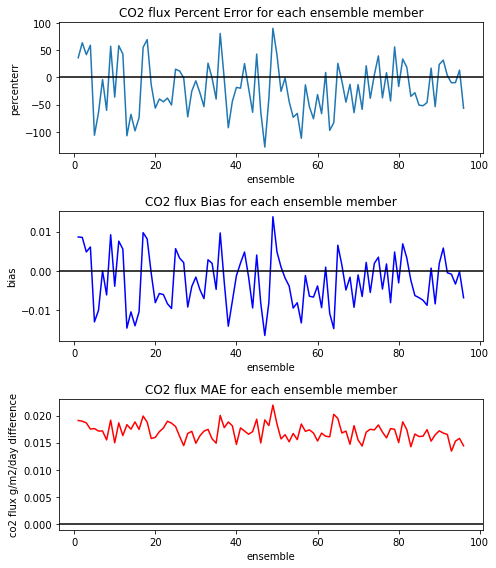

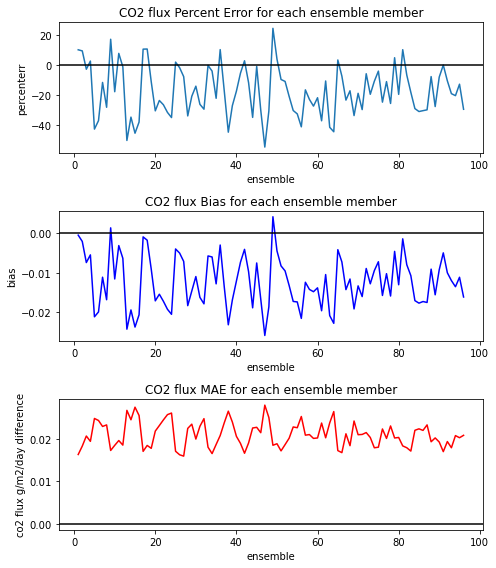

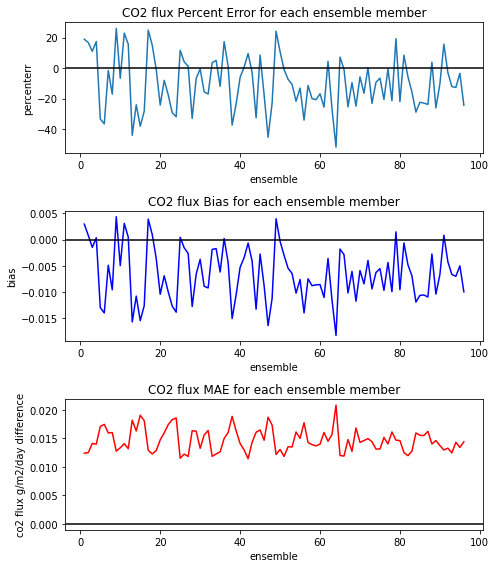

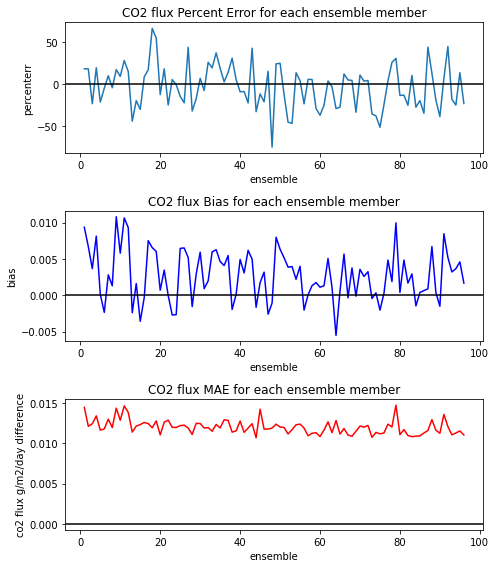

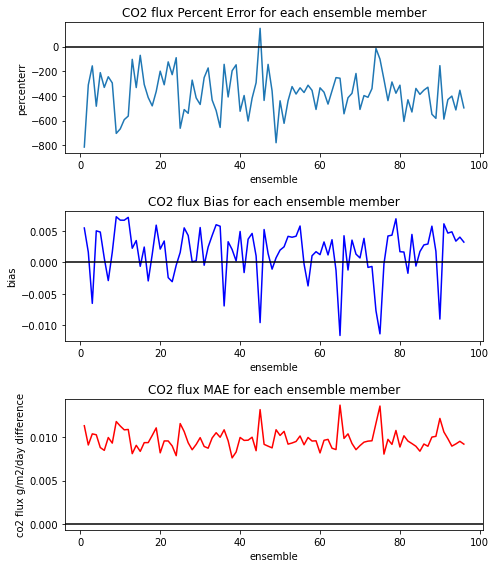

In [83]:
for region in [0,1,2,3,4,5,6]:
    #Lets check the errors. 
    plt.figure(figsize=(7,8))
    plt.subplot(311)
    regional_err.sel(region=region).percenterr.plot()
    plt.title('CO2 flux Percent Error for each ensemble member')
    plt.axhline(0,c='k')
    plt.subplot(312)
    regional_err.sel(region=region).bias.plot(c='b')
    plt.axhline(0,c='k')
    plt.title('CO2 flux Bias for each ensemble member')
    plt.subplot(313)
    regional_err.sel(region=region).mae.plot(c='r')
    plt.axhline(0,c='k')
    plt.title('CO2 flux MAE for each ensemble member')
    plt.ylabel('co2 flux g/m2/day difference')

    plt.tight_layout()

In [87]:
regional_err.sel(region=0).mae.plot(c='r'),plt.axhline(0.01)

In [2]:
for region in [0,1,2,3,4,5,6]:
    eqpac_mae=regional_err.sel(region=region).mae
    eqpac_mae.where(eqpac_mae<0.009).dropna(dim='ensemble')

NameError: name 'regional_err' is not defined

In [113]:
eqpac_mae

<xarray.DataArray 'mae' (ensemble: 96)>
array([0.011328, 0.009105, 0.010389, 0.010286, 0.008809, 0.008485, 0.009966,
       0.009323, 0.01181 , 0.011293, 0.010853, 0.010898, 0.008104, 0.009066,
       0.008367, 0.009375, 0.00938 , 0.010209, 0.01108 , 0.0082  , 0.009572,
       0.009571, 0.008994, 0.007871, 0.011577, 0.010653, 0.009361, 0.008556,
       0.009169, 0.009952, 0.008935, 0.008737, 0.009918, 0.010522, 0.009998,
       0.010859, 0.00959 , 0.007617, 0.008294, 0.009975, 0.009635, 0.009659,
       0.010001, 0.008445, 0.013187, 0.00918 , 0.00897 , 0.008772, 0.010865,
       0.010207, 0.010678, 0.009202, 0.009335, 0.009512, 0.010146, 0.009131,
       0.009972, 0.009561, 0.009587, 0.008191, 0.009648, 0.009752, 0.008731,
       0.008577, 0.013705, 0.009865, 0.010391, 0.009276, 0.008563, 0.009033,
       0.00943 , 0.009549, 0.009591, 0.011609, 0.0136  , 0.008052, 0.009754,
       0.009175, 0.010783, 0.008872, 0.010169, 0.00956 , 0.00927 , 0.008957,
       0.008388, 0.009218, 0.008959, 0.010019, 0.010103, 0.012173, 0.010609,
       0.009829, 0.008974, 0.009228, 0.009529, 0.009204])
Coordinates:
  * ensemble  (ensemble) int32 1 2 3 4 5 6 7 8 9 ... 88 89 90 91 92 93 94 95 96
    region    int64 6

In [1]:
eqpac_mae.where(eqpac_mae<0.01)#.sortby('ensemble')

NameError: name 'eqpac_mae' is not defined

In [77]:
regional_err.sel(ensemble=47).bias

<xarray.DataArray 'bias' (region: 7)>
array([-0.015285, -0.035203, -0.016528, -0.025866, -0.016397, -0.002599,
        0.001403])
Coordinates:
    ensemble  int32 47
  * region    (region) int64 0 1 2 3 4 5 6

In [75]:
regional_err.sel(ensemble=47).percenterr

<xarray.DataArray 'percenterr' (region: 7)>
array([ -51.470632,  -42.258863, -128.097947,  -54.476771,  -45.367907,
         15.481179, -144.075998])
Coordinates:
    ensemble  int32 47
  * region    (region) int64 0 1 2 3 4 5 6

In [69]:
regional_err.sel(region=0).bias.idxmin().values

array(47.)

In [29]:
# err_tmean.to_netcdf('../processed_data/err/CO2_flux_meanerror.nc')

TypeError: cannot directly convert an xarray.Dataset into a numpy array. Instead, create an xarray.DataArray first, either with indexing on the Dataset or by invoking the `to_array()` method.

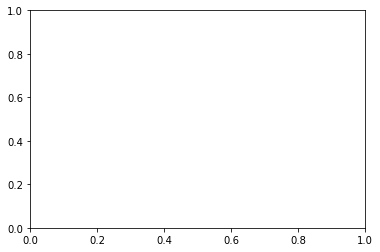

In [29]:
plt.pcolormesh(anth_co2_perc.mean(dim='time'))

In [13]:
cafe_co2_natural_meanplt.pcolormesh(anth_co2_perc.mean(dim='time'))

<xarray.Dataset>
Dimensions:  (time: 456, lon: 170, lat: 98)
Coordinates:
  * time     (time) datetime64[ns] 1982-01-01 1982-02-01 ... 2019-12-01
  * lon      (lon) float64 120.5 121.5 122.5 123.5 ... 286.5 287.5 288.5 289.5
  * lat      (lat) float64 -19.36 -18.59 -17.85 -17.15 ... 17.85 18.59 19.36
Data variables:
    stf07    (time, lat, lon) float32 ...

In [ ]:
#They don't line up very well so lets check the seasonality
#clim=xr.open_dataset('/scratch1/pit071/CAFE60/processed/obs/landshutzermatear_clim_eqpac_regrid.nc').fgco2_clim/365
labels=['Whole EqPac',
       'SouthEast EqPac',
       'NorthEast EqPac',
        'All East EqPac',
        'Central EqPac',
        'Dateline EqPac',
        'FarWest EqPac']

locs=[[-15,15,150,275],
      [-15,0,225,250],
      [0,15,225,250],
      [-15,15,225,250],
      [-15,15,200,225],
      [-15,15,175,200],
      [-15,15,150,175]]
      
plt.figure(figsize=(20,12))

for i,latlon in enumerate(locs):
    print('starting '+str(latlon))
    cafe_seasonality=cafe_co2_all_g.sel(lat=slice(latlon[0],latlon[1]),lon=slice(latlon[2],latlon[3])).stf10.groupby('time.month').mean()
 
    land_seasonality=land_co2.fgco2_smoothed.sel(lat=slice(latlon[0],latlon[1]),lon=slice(latlon[2],latlon[3])).groupby('time.month').mean().mean(dim=['lat','lon'])

    if i==0:
        ax=plt.subplot(3,1,1)
    else:
        ax=plt.subplot(3,3,3+i)
        
    err=cafe_seasonality.std(dim='ensemble').mean(dim=['lat','lon']).load()
    m=cafe_seasonality.mean(['lat','lon','ensemble']).load()
    
    ax.fill_between(err.month,m+(err*1),m-(err*1),alpha=0.2,color='blue')
    ax.fill_between(err.month,m+(err*2),m-(err*2),alpha=0.2,color='blue')
    ax.fill_between(err.month,m+(err*3),m-(err*3),alpha=0.2,color='blue')

    ax.plot(land_seasonality.month,land_seasonality,c='k',linewidth=2)
   
    #olc=clim.sel(lat=slice(latlon[0],latlon[1]),lon=slice(latlon[2],latlon[3])).mean(dim=['lat','lon'])
    #olc['monthclim']=olc['monthclim']+1
    #ax.plot(olc.monthclim,olc,c='k',linewidth=2,linestyle='--')
    
    
    #Ok we could plot the individual lines using seaborn. 
    
    #land_seasonality=land_seasonality.to_dataframe().reset_index()
    #seasonal=cafe_seasonality.stf10.mean(dim=['lat','lon']).to_dataframe().reset_index()
    #sns.lineplot(data=seasonal,x='month',y='stf10',hue='ensemble',ax=ax)#,hue='ensemble')
    #sns.lineplot(data=land_seasonality,x='month',y='fgco2_smoothed',color='k',linewidth=3,ax=ax)#,hue='ensemble')
        
    ax.set_xlim([1,12])
    ax.set_ylabel('Air-Sea C Outgassing gC/m2/day')
    ax.set_title('CAFE60 CO2 flux vs Landschutzer: '+labels[i])
    ax.legend(['land2018','1-3std']) #,
plt.tight_layout()